runge-kutta
===

dy/dt = f(t,y)  
y_ {n+1} = y_n + 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
t_ {n +1} = t_n + h

k1 = h * f(f_n, y_n)
k2 = h * f 

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def deposit(D0, t):
    if t == 0:
        return D0
    D = D0 / t
    if D > 0:
        return D
    return 0

In [88]:
def savings_account_ode(t, A, W, D, r):
    dA_dt = r * A + deposit(D, t) - W
    return dA_dt

In [89]:
def runge_kutta_4th_order(f, t0, A0, r, D, W, h, n_iters):
    t_values = [t0]
    A_values = [A0]
    
    for _ in range(n_iters):
        t = t_values[-1]
        A = A_values[-1]

        k1 = h * f(t, A, W, D, r)
        k2 = h * f(t + h/2, A + k1/2, W, D, r)
        k3 = h * f(t + h/2, A + k2/2, W, D, r)
        k4 = h * f(t + h, A + k3, W, D, r)

        A_new = A + (k1 + 2*k2 + 2*k3 + k4)/6
        t_new = t + h

        t_values.append(t_new)
        A_values.append(A_new)
    return t_values, A_values
    

In [90]:
t0 = 0
A0 = 100
W = 50
D = 100
r = 0.05
h = 0.01
n_iters = 5000

t_values, A_values = runge_kutta_4th_order(savings_account_ode, t0, A0, r, D, W, h, n_iters)

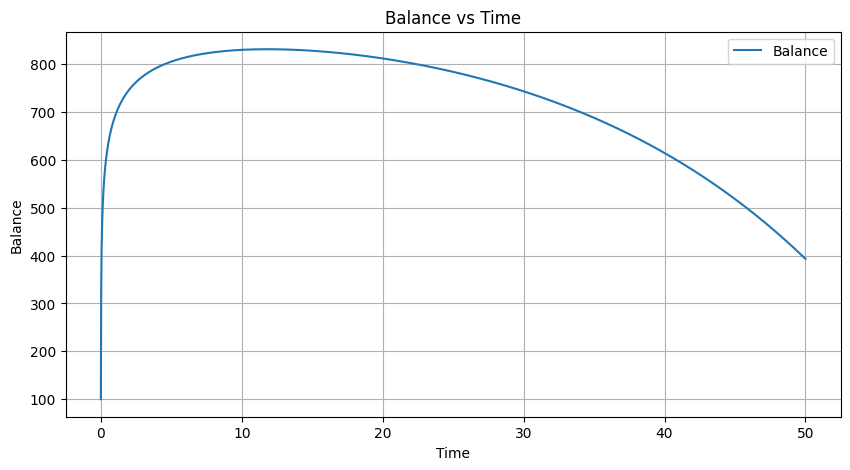

In [91]:
_ = plt.figure(figsize=(10, 5))
plt.plot(t_values, A_values, label = "Balance")
plt.xlabel("Time")
plt.ylabel("Balance")
plt.legend()
plt.title("Balance vs Time")
plt.grid()
plt.show()

da/dt = rA + D - W * A / 100

dW/dt = k/t + A/B

In [92]:
def savings_account_ode(t, A, r, W, D, k, B, t_change = 0):
    da_dt = r * A + D - W * A / 100
    if t > t_change:
       dw_dt = k / t + A / B
    else:
        dw_dt = 0
    
    return da_dt, dw_dt

In [93]:
def runge_kutta_4th_order_coupled(f, t0, A0, W0, r, D, k, B, h, t_change, n_iters):
    t_values = [t0]
    A_values = [A0]
    W_values = [W0]

    for _ in range(n_iters):
        t = t_values[-1]
        A = A_values[-1]
        W = W_values[-1]

        k1_A, k1_W = f(t, A, W, r, D, k, B, t_change)
        k1_A = h * k1_A
        k1_W = h * k1_W

        k2_A, k2_W = f(t + h/2, A + k1_A/2, W + k1_W/2, r, D, k, B, t_change)
        k2_A = h * k2_A
        k2_W = h * k2_W

        k3_A, k3_W = f(t + h/2, A + k2_A/2, W + k2_W/2, r, D, k, B, t_change)
        k3_A = h * k3_A
        k3_W = h * k3_W

        k4_A, k4_W = f(t + h, A + k3_A, W + k3_W, r, D, k, B, t_change)
        k4_A = h * k4_A
        k4_W = h * k4_W

        A_new = A + (k1_A + 2*k2_A + 2*k3_A + k4_A)/6
        W_new = W + (k1_W + 2*k2_W + 2*k3_W + k4_W)/6
        t_new = t + h

        t_values.append(t_new)
        A_values.append(A_new)
        W_values.append(W_new)

    return t_values, A_values, W_values

In [94]:
t0 = 0.00001
A0 = 100
W0 = 10
r = 0.05
D = 50
k = 0.1
B = 200
h = 0.01
t_change = 0.01 * 100 * 6
n_iters = 5000
t_values, A_values, W_values = runge_kutta_4th_order_coupled(savings_account_ode, t0, A0, W0, r, D, k, B, h, t_change, n_iters)

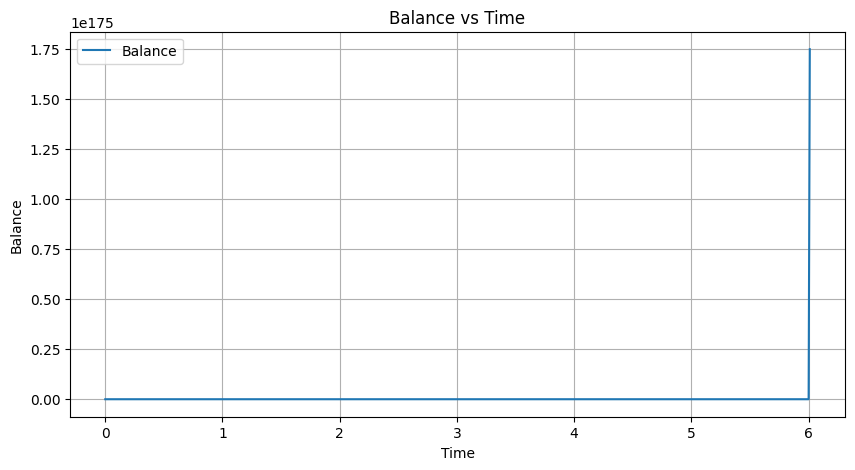

In [95]:
_ = plt.figure(figsize=(10, 5))
plt.plot(t_values, A_values, label = "Balance")
plt.xlabel("Time")
plt.ylabel("Balance")
plt.legend()
plt.title("Balance vs Time")
plt.grid()
plt.show()
